In [16]:
import networkx as nx
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
import random 
import pickle

class plot_3d_network:

    def __init__(self,adjancy_matrix,position,path):
        self.adj = adjancy_matrix
        self.pos = position
        self.name = path

    def figure(self,graph,angle=30):
        #pos = nx.get_node_attributes(graph,'pos')
        with plt.style.context("bmh"):
            fig = plt.figure(figsize=(10,7))
            ax = Axes3D(fig)
            for xi,yi,zi in self.pos:      
                ax.scatter(xi,yi,zi,edgecolor='b',alpha=0.9,s=100)
                for i,j in enumerate(graph.edges()):
                    x = np.array((self.pos[j[0]-1][0],self.pos[j[1]-1][0]))
                    y = np.array((self.pos[j[0]-1][1],self.pos[j[1]-1][1]))
                    z = np.array((self.pos[j[0]-1][2],self.pos[j[1]-1][2]))
                    ax.plot(x,y,z,c='black',alpha=0.9, linewidth=0.5)
        ax.view_init(30,angle)
 
        pickle.dump(fig,open('FigureObject.fig.pickle','wb'))
        #ax.set_facecolor('white')
        plt.savefig(self.name+'.png',bbox_inches='tight')
        plt.show()


    def graph_gen(self,cutoff=0.5):
        node_index = []
        for i in range(self.adj.shape[0]):
            node_index.append(i+1)
        
        edge_list = []
        correlation_list = np.where((np.triu(self.adj,1) < -cutoff) | (np.triu(self.adj,1)>cutoff))
        for k in range(0,correlation_list[0].shape[0]):
            edge_list.append((correlation_list[0][k]+1,correlation_list[1][k]+1))

        G = nx.DiGraph()
        G.add_edges_from(edge_list)
        G.add_nodes_from(node_index)
        return G
    
    def graph_gen_origin(self,cutoff=0.5):
        node_index = []
        for i in range(self.adj.shape[0]):
            node_index.append(i+1)
        
        edge_list = []
        #correlation_list = np.where((np.triu(self.adj,1) < -cutoff) | (np.triu(self.adj,1)>cutoff))
        for k in range(len(node_index)-1):
            edge_list.append((node_index[k],node_index[k]+1))

        G = nx.DiGraph()
        G.add_edges_from(edge_list)
        G.add_nodes_from(node_index)
        return G
    
    def plot_network(self):
        #graph = self.graph_gen()
        graph = self.graph_gen_origin()
        self.figure(graph,angle=30)

@> PDB file is found in working directory (1ubq.pdb.gz).
@> 660 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> Hessian was built in 0.02s.
@> 20 modes were calculated in 0.00s.


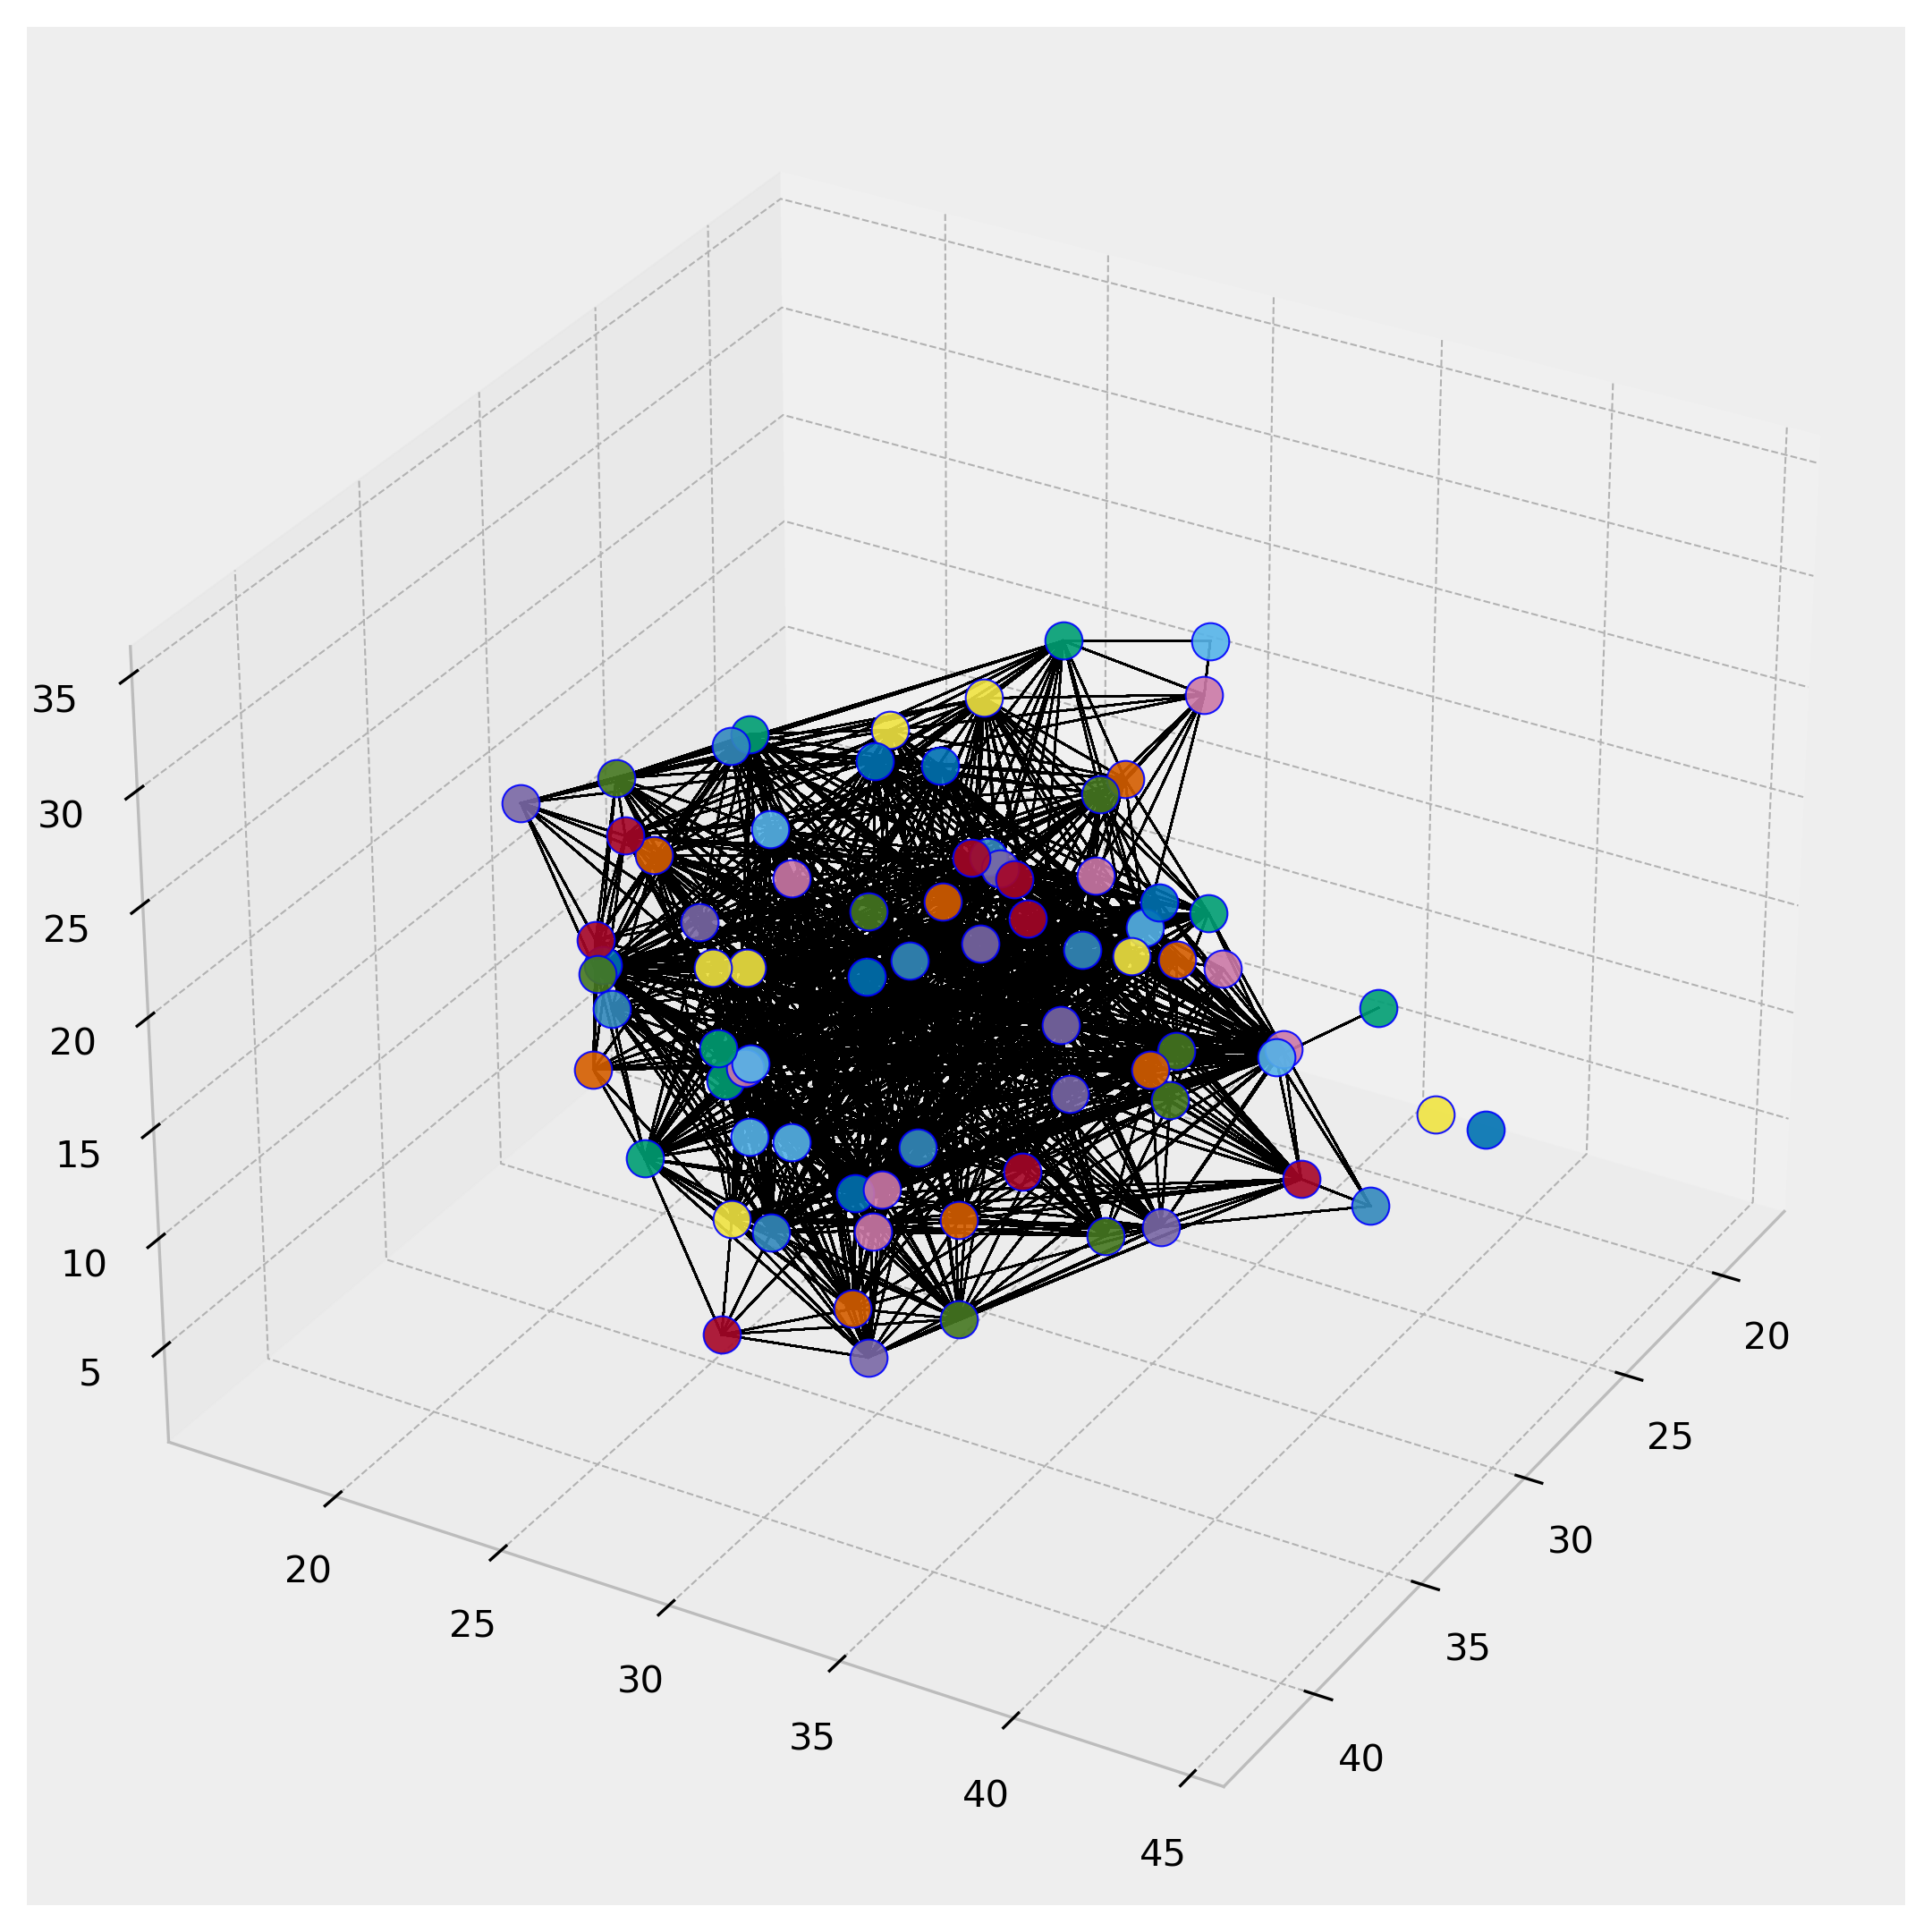

In [5]:
from prody import *
import matplotlib.pyplot as plt
import numpy as np
import parmed as pmd
#from bin import v3d_plot
plt.rcParams['savefig.dpi'] = 300
plt.rcParams['figure.dpi'] = 300

def get_reduce_index(structure,name="CA"):
    red_index = []
    for i in structure.atoms:
        red_index.append(i.name)         
    red_index = np.array(red_index)
    return np.where(red_index==name)[0]

pro = parsePDB('1UBQ')
calphas = pro.select('protein and name CA')
anm = ANM('pro ANM analysis')
anm.buildHessian(calphas)
anm.calcModes(n_modes=20)
corr = calcCrossCorr(anm)

'''
fig, ax = plt.subplots()
im = ax.imshow(corr,vmin=-1, vmax=1, cmap='cool')
fig.colorbar(im, ax=ax, label='Cross correlation')
ax.invert_yaxis()
plt.savefig('./result/anm.png',bbox_inches='tight')
'''
pdb = pmd.load_file('./example/ubq.pdb')
ca_index = get_reduce_index(pdb)
ca_position = pdb.coordinates[ca_index,:]
graph = plot_3d_network(corr,ca_position,'ANM_graph')
graph.plot_network()


In [3]:
ubi = parsePDB('1UBQ')
calphas = ubi.select('protein and name CA')
gnm = GNM('Ubiquitin')
gnm.buildKirchhoff(calphas)
gnm.calcModes(n_modes=20)
corr = calcCrossCorr(gnm)

@> PDB file is found in working directory (1ubq.pdb.gz).
@> 660 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> Kirchhoff was built in 2.83s.
@> 20 modes were calculated in 0.00s.


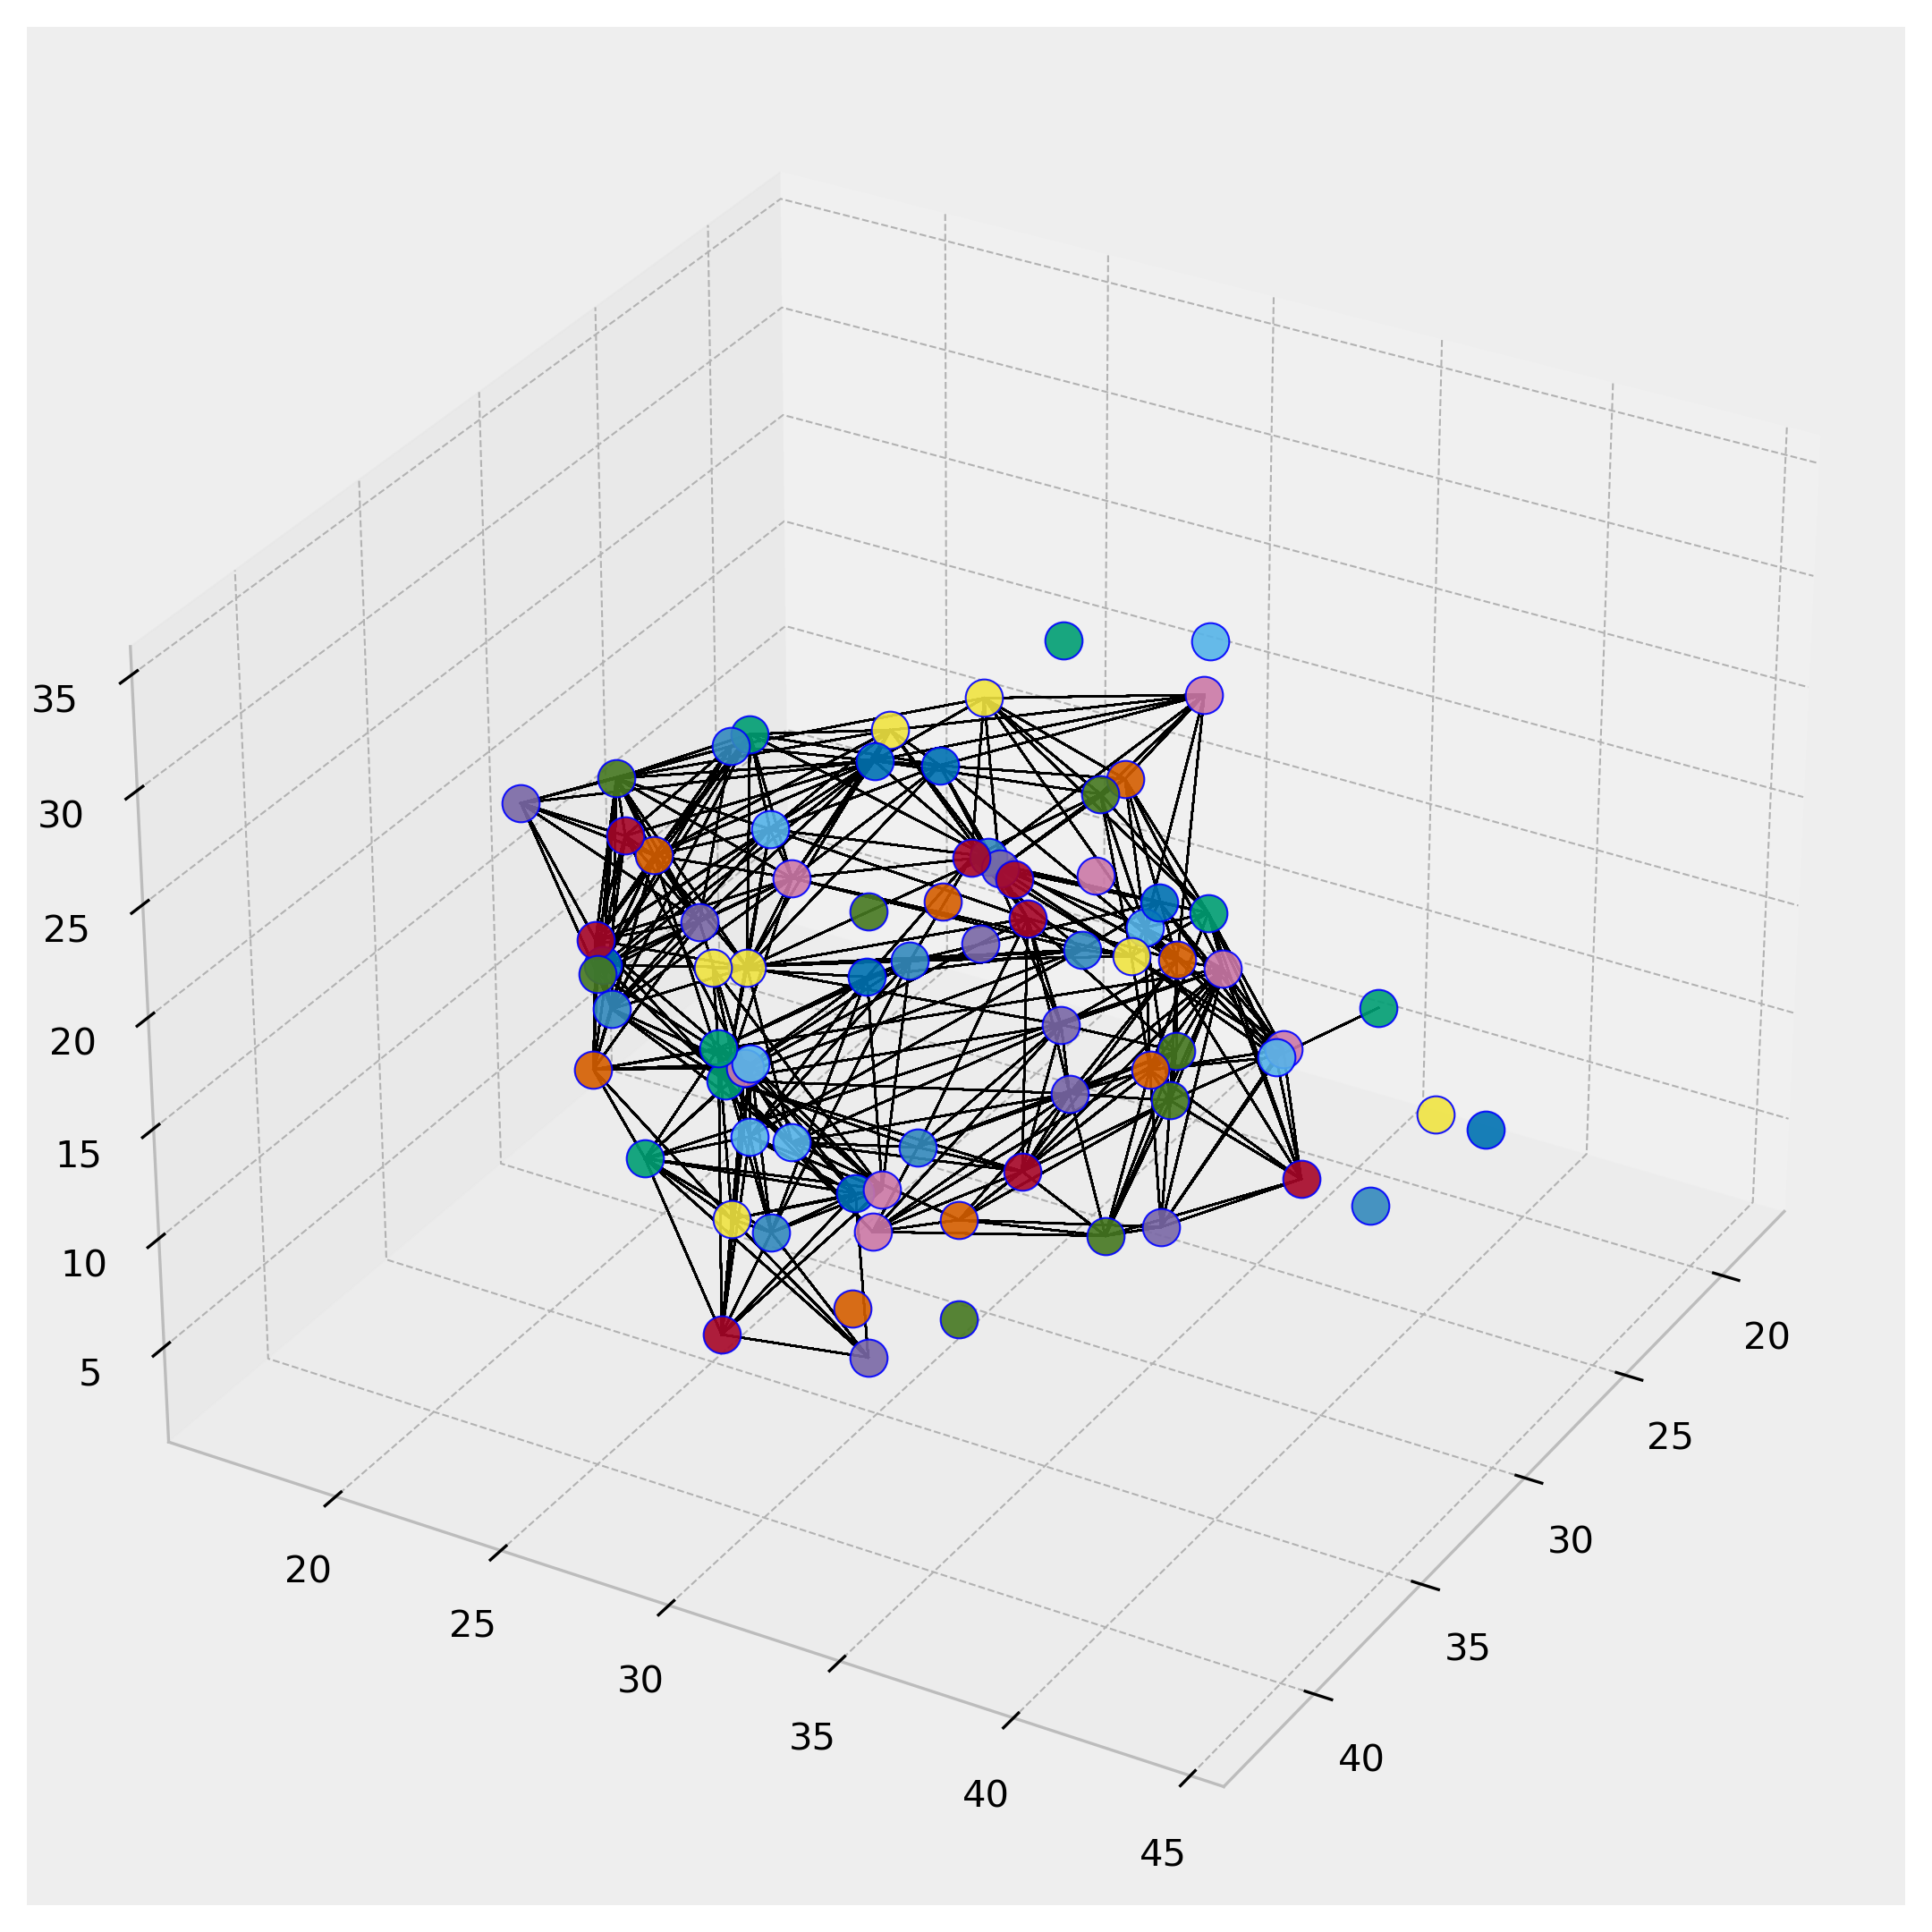

In [4]:
pdb = pmd.load_file('./example/ubq.pdb')
ca_index = get_reduce_index(pdb)
ca_position = pdb.coordinates[ca_index,:]
graph = plot_3d_network(corr,ca_position,'GNM_graph')
graph.plot_network()


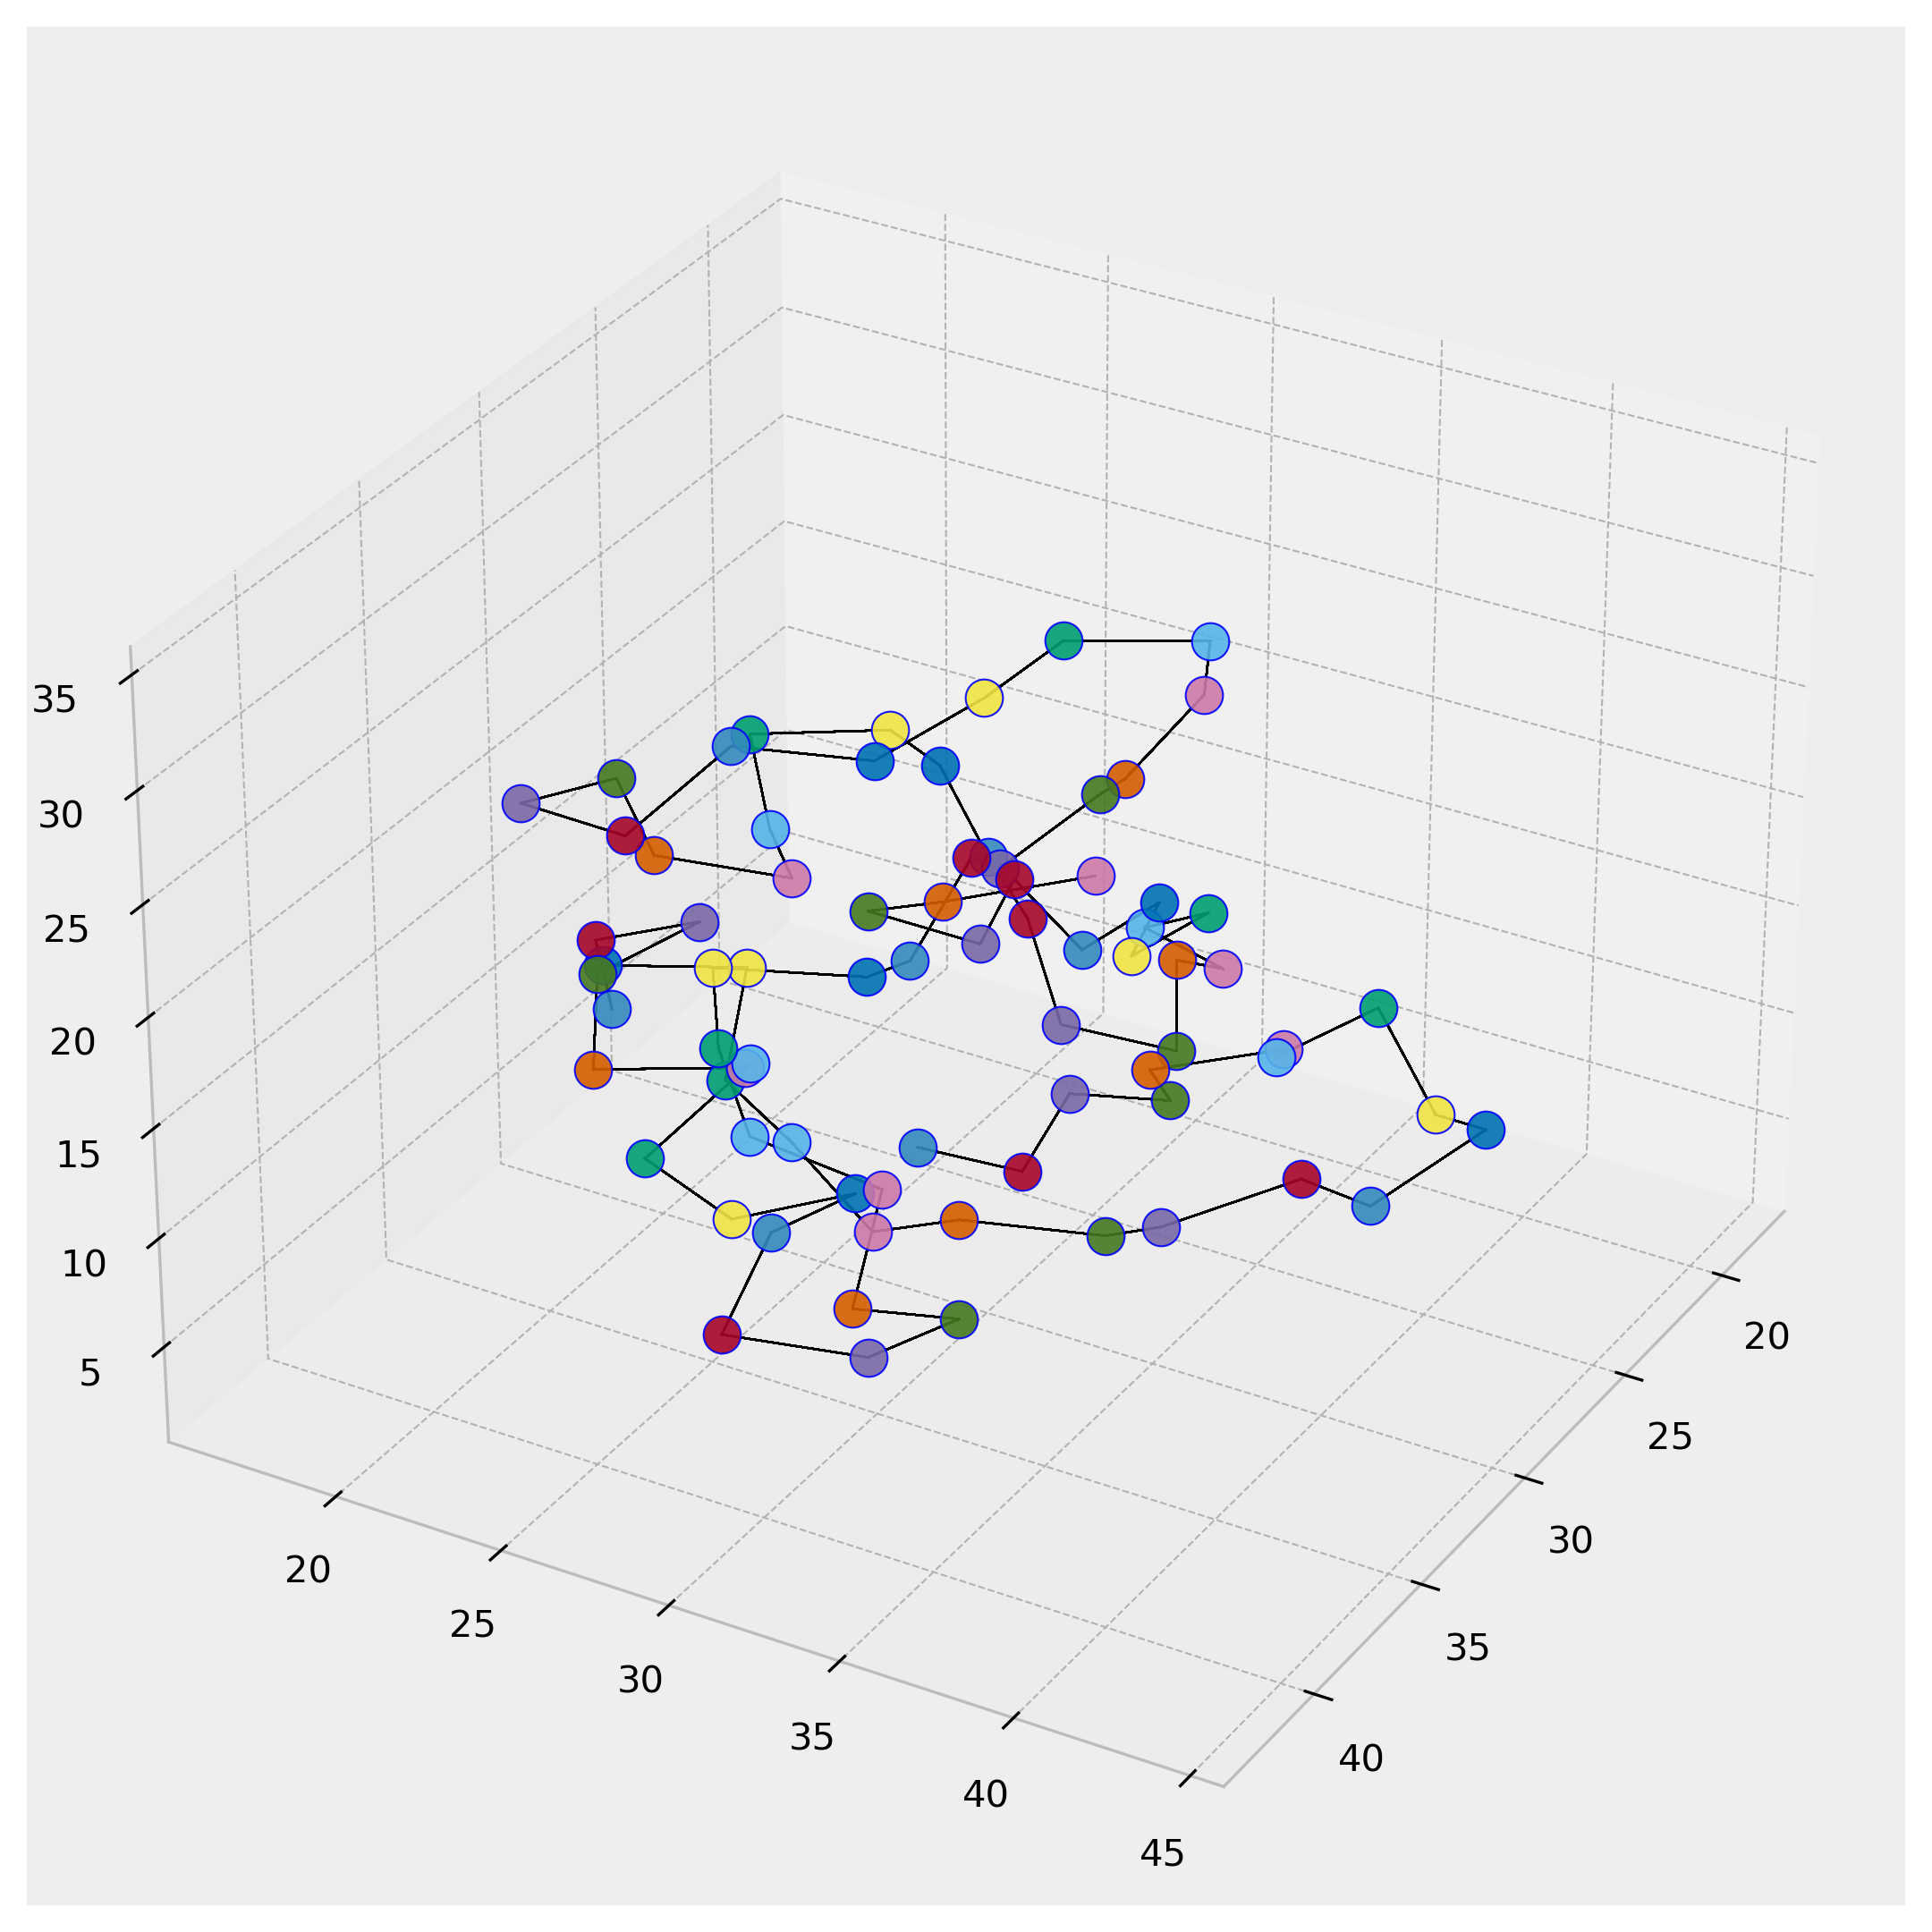

In [17]:
own_corr = np.load('own.npy')
pdb = pmd.load_file('./example/ubq.pdb')
ca_index = get_reduce_index(pdb)
ca_position = pdb.coordinates[ca_index,:]
graph = plot_3d_network(own_corr,ca_position,'origin2_graph')
graph.plot_network()

array([[ 9.99999940e-01,  7.75419652e-01, -7.39701331e-01, ...,
        -4.66937927e-04,  5.37439832e-04,  2.83288979e-03],
       [ 7.75419652e-01,  9.99999940e-01, -5.15513539e-01, ...,
         3.70967609e-05,  2.74302758e-04,  5.98384300e-03],
       [-7.39701331e-01, -5.15513539e-01,  9.99999940e-01, ...,
        -1.01538440e-02,  1.55985085e-02, -1.37507124e-02],
       ...,
       [-4.66937927e-04,  3.70967609e-05, -1.01538440e-02, ...,
         1.00000000e+00, -4.13393468e-01,  3.40885371e-01],
       [ 5.37439832e-04,  2.74302758e-04,  1.55985085e-02, ...,
        -4.13393468e-01,  1.00000000e+00,  6.81921244e-01],
       [ 2.83288979e-03,  5.98384300e-03, -1.37507124e-02, ...,
         3.40885371e-01,  6.81921244e-01,  1.00000000e+00]], dtype=float32)